In [2]:
library(rstan)
library(bayesplot)

rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

In [3]:
source("plotSSM.R", encoding = "utf-8")

In [6]:
sales_df_all  <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/5-2-1-sales-ts-1.csv")
sales_df_all$date <- as.POSIXct(sales_df_all$date)

In [7]:
head(sales_df_all)

date,sales
<dttm>,<dbl>
2010-01-01,23.9
2010-01-02,19.0
2010-01-03,20.3
2010-01-04,24.2
2010-01-05,19.3
2010-01-06,16.7


In [8]:
summary(sales_df_all)

      date                         sales      
 Min.   :2010-01-01 00:00:00   Min.   : 5.90  
 1st Qu.:2010-01-25 18:00:00   1st Qu.:11.75  
 Median :2010-02-19 12:00:00   Median :15.30  
 Mean   :2010-02-19 12:00:00   Mean   :15.50  
 3rd Qu.:2010-03-16 06:00:00   3rd Qu.:19.23  
 Max.   :2010-04-10 00:00:00   Max.   :24.20  

Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”

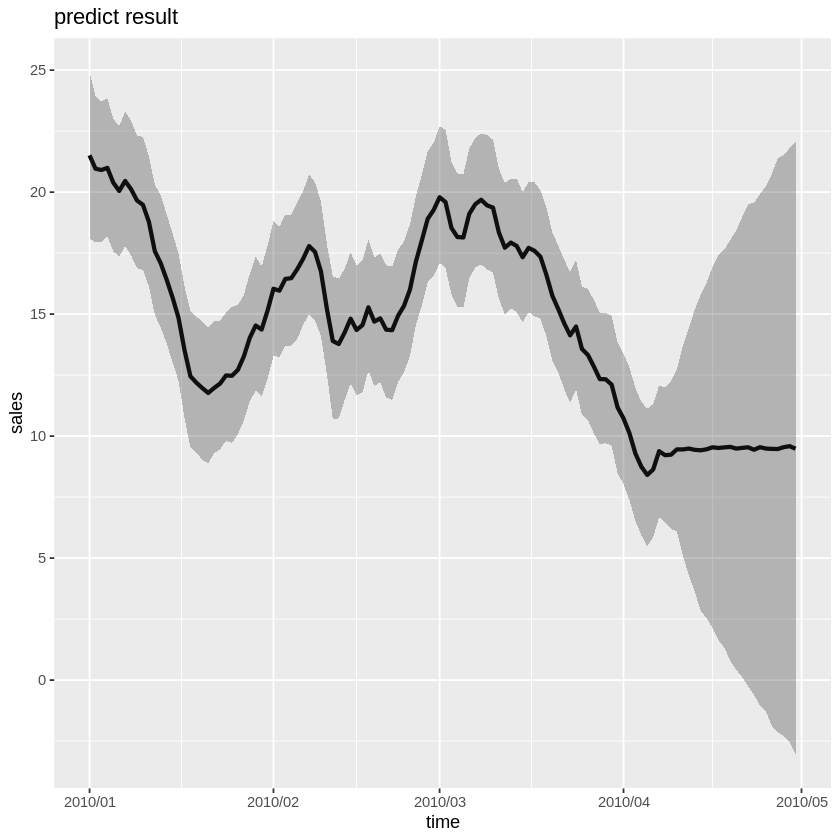

In [10]:
data_list_pred <- list(
    T = nrow(sales_df_all),
    y = sales_df_all$sales,
    pred_term = 20
)

local_level_pred <- stan(
    file = "5-3-1-local-level-pred.stan",
    data = data_list_pred,
    seed = 1
)

date_plot <- seq(
    from = as.POSIXct("2010-01-01"),
    by = "days",
    len = 120
)

mcmc_sample_pred <- rstan::extract(local_level_pred)

plotSSM(mcmc_sample = mcmc_sample_pred,
        time_vec = date_plot,
        state_name = "mu_pred",
        graph_title = "predict result",
        y_label = "sales"
)

In [13]:
sales_df_NA  <- read.csv("https://raw.githubusercontent.com/logics-of-blue/book-r-stan-bayesian-model-intro/master/book-data/5-3-1-sales-ts-1-NA.csv")
head(sales_df_NA)

date,sales
<fct>,<dbl>
2010-01-01,23.9
2010-01-02,19.0
2010-01-03,NA
2010-01-04,24.2
2010-01-05,19.3
2010-01-06,16.7


In [14]:
summary(sales_df_NA)

         date        sales      
 2010-01-01: 1   Min.   : 6.20  
 2010-01-02: 1   1st Qu.:11.60  
 2010-01-03: 1   Median :15.40  
 2010-01-04: 1   Mean   :15.51  
 2010-01-05: 1   3rd Qu.:19.18  
 2010-01-06: 1   Max.   :24.20  
 (Other)   :94   NA's   :26     

In [15]:
sales_df_NA$date <- as.POSIXct(sales_df_NA$date)

In [16]:
sales_df_omit_NA <- na.omit(sales_df_NA)
head(sales_df_omit_NA)

,date,sales
,<dttm>,<dbl>
1,2010-01-01,23.9
2,2010-01-02,19.0
4,2010-01-04,24.2
5,2010-01-05,19.3
6,2010-01-06,16.7
7,2010-01-07,24.2


In [18]:
nrow(sales_df_NA)

[1] 100

In [17]:
nrow(sales_df_omit_NA)

[1] 74

In [19]:
!is.na(sales_df_NA$sales)

[1]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE

In [20]:
which(!is.na(sales_df_NA$sales))

[1]   1   2   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
[20]  21  22  23  24  25  26  49  50  51  52  53  54  55  56  57  58  59  60  61
[39]  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  80  81  82
[58]  83  84  85  86  87  88  89  90  91  92  93  94  96  97  98  99 100

In [21]:
which(is.na(sales_df_NA$sales))

[1]  3 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 78 79
[26] 95

In [31]:
data_list_interpolation <- list(
    T = nrow(sales_df_NA),
    len_obs = nrow(sales_df_omit_NA),
    y = sales_df_omit_NA$sales,
    obs_no = which(!is.na(sales_df_NA$sales))
)

local_level_interpolation <- stan(
    file = "5-3-2-local-level-interpolation.stan",
    data = data_list_interpolation,
    seed = 1,
    iter = 4000
)

hash mismatch so recompiling; make sure Stan code ends with a blank line


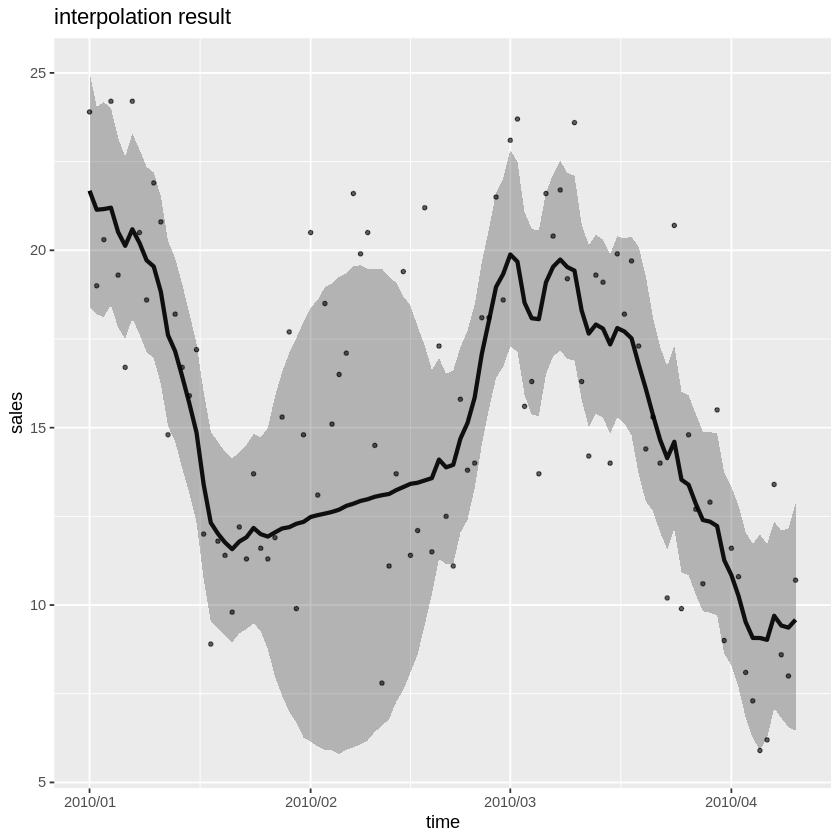

In [32]:
mcmc_sample_interpolation <- rstan::extract(
    local_level_interpolation
)

plotSSM(mcmc_sample = mcmc_sample_interpolation,
        time_vec = sales_df_all$date,
        obs_vec = sales_df_all$sales,
        state_name = "mu",
        graph_title = "interpolation result",
        y_label = "sales"
)